# Kuramoto-Shinomoto-Sakaguchi MV-SDE + FUNZIONI

Importiamo, in primis, i pacchetti necessari per usarele funzioni matematiche in python

In [5]:
import math
import numpy as np 
import matplotlib.pyplot as plt

Scriviamo l'equazione di Kuramoto-Shninomoto-Sakaguchi in forma differenziale

$ dX_t = \left( \mathbb{E}[sen(X_t)] cos(X_t) - \mathbb{E}[cos(X_t)]sen(X_t) \right) dt + \sigma dW_t , \ \ \ X_0=x_0 $

Da questa equazione differenziale si evince che:
    K = 3, d = 1, q = 1 e
    $\varphi(x)=(1, senx, cosx)$, $\alpha(t,x)=(0, cosx, -senx)^T$ e $\beta(t,x)=(\sigma, 0, 0)^T$

Per ora ne cosideriamo una versione semplificata in cui i due valori attesi sono sostituiti da due costanti $c_1$ e $c_2$.

Siamo pronti per definire la prima funzione che applica il Metodo di Eulero a un vettore X preso in input, assieme alle costanti $c_1$ e $c_2$, le due funzioni $\alpha$ e $\beta$ , il numero di simulazioni M e il valore dello step temporale h

In [6]:
def eulero(c1, c2, alfa, beta, h, M, X):
    W = np.random.normal(0, 1, M) 
    drift = ( c1 * alfa(X)[0,:] ) + ( c2 * alfa(X)[1,:] )
    diffusione = beta 
    X = X + drift * h + diffusione * math.sqrt(h) * W 
    
    return X

Ora definiamo la funzione volta ad applicare il metodo Monte Carlo, che banalmente fa la media degli M valori di un vettore preso in input 

In [7]:
def monte_carlo(Y):
    num = Y.size
    MC = sum(Y) / num
    return MC

Concludiamo riportanto il main che richiama le due funzioni sopra definite. Notiamo come il Metodo di Eulero vada applicato ciclicamente per ogni step temporale affinchè sia valido questo algoritmo.

Ricordiamo a cosa corrisponderanno i valori che daremo in input nelle funzioni appena deifinite
* N : numero di iterazioni (steps temporali)
* M : numero di simulazioni in ogni istante
* T : istante finale
* $X_0$ : valore iniziale
* h : step temporale
* $\alpha$ : funzione di Drift
* $\beta$ : funzione di Diffuzione
* $\varphi$ : funzione payoff

[37.20422057 36.99479349 36.94562191 ... 37.24629527 37.22363386
 37.15314317]
-0.5759844592223508


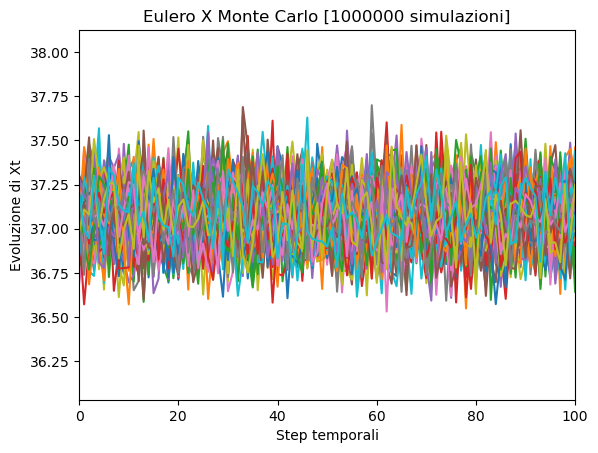

In [8]:
if __name__ == "__main__":
    
    # Parametri in Input
    T = 10
    N = 100
    M = 1000000
    X0 = 37
    
    sigma = 0.5
    c1 = 1
    c2 = 0
    
    phi = lambda x : np.array([c1 * np.sin(x), c2 * np.cos(x)])
    alfa = lambda x : np.array([np.cos(x), - np.sin(x)])
    beta = sigma
    
    fig = plt.figure()
    plt.title("Eulero X Monte Carlo [" + str(M) + " simulazioni]")
    plt.xlabel("Step temporali")
    plt.ylabel("Evoluzione di Xt")
    plt.xlim([0, N])
    
    # Richiamo funzione
    h = T / N
    X = X0 * np.ones(M)
    
    for i in range(N):
        XT = eulero(c1, c2, alfa, beta, h, M, X)
        plt.plot(XT)
        
    YT = ( phi(XT)[0,:] ) + ( phi(XT)[1,:] )
    PayOff = monte_carlo(YT)
    
    print(XT)
    print(PayOff)
    plt.show()